### First lets understand in how many ways you can login to HF

In [1]:
!pip install --upgrade huggingface_hub

| 🔢 Method                               | Code / Command                               | Used In                                                                                                                        | Description                                                                                       |
| --------------------------------------- | -------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------- |
| **1**                                   | `!huggingface-cli login`                     | Terminal / Colab / Jupyter (Shell cell)                                                                                      | CLI command. Prompts you to paste your HF token and saves it in global config. Works system-wide. |
| **2**                                   | `from huggingface_hub import HfApi`          |                                                                                                                                |                                                                                                   |
| `api = HfApi(token="YOUR_WRITE_TOKEN")` | Python Scripts / Automation                | Directly initializes an API object with token (temporary). Useful for scripting, CI/CD, etc. Doesn’t store token globally.     |                                                                                                   |
| **3**                                   | `from huggingface_hub import login`          |                                                                                                                                |                                                                                                   |
| `login("YOUR_TOKEN")`                   | Python Scripts                             | Programmatic login — stores token in local Hugging Face config (like CLI does). Good alternative to CLI login inside a script. |                                                                                                   |
| **4**                                   | `from huggingface_hub import notebook_login` |                                                                                                                                |                                                                                                   |
| `notebook_login()`                      | Jupyter / Colab Notebooks                  | Interactive login box inside notebooks. Token is saved in session/local config. Beginner-friendly.                             |                                                                                                   |


In [2]:
from google.colab import userdata

In [4]:
READ_TOKEN=userdata.get("HF_TOKEN_READ")

In [6]:
WRITE_TOKEN=userdata.get('HF_TOKEN_WRITE')

In [ ]:
# import os
# os.environ["HF_READ_TOKEN"] = userdata.get("HF_READ_TOKEN")
# os.environ["HF_WRITE_TOKEN"] = userdata.get("HF_WRITE_TOKEN")


#### First is CLI

In [ ]:
#This command tells Git to save your credentials (username + password or token) permanently in a plain text file on your computer,
#so you don’t have to enter them again when pushing/pulling from a remote repo.

In [11]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write

In [12]:
!huggingface-cli whoami

sunny199


#### for this one you will have to use token with write permission

In [13]:
!huggingface-cli repo create livehfcourse --repo-type model

Successfully created sunny199/livehfcourse on the Hub.
Your repo is now available at https://huggingface.co/sunny199/livehfcourse


In [14]:
!huggingface-cli repo create livehfdatacourse --repo-type dataset

Successfully created sunny199/livehfdatacourse on the Hub.
Your repo is now available at https://huggingface.co/datasets/sunny199/livehfdatacourse


In [ ]:
!huggingface-cli repo create dummy --repo-type=space --space=docker

Successfully created sunny199/dummy on the Hub.
Your repo is now available at https://huggingface.co/spaces/sunny199/dummy


### Seond Via API

In [16]:
import os
from huggingface_hub import HfApi
from google.colab import userdata

In [17]:
api = HfApi(token=WRITE_TOKEN)

In [18]:
api.create_repo(
    repo_id="sunny199/sunnyrepo",  # full path
    repo_type="model",                         # or just skip (default is model)
    private=False                              # set True for private repo
)

RepoUrl('https://huggingface.co/sunny199/sunnyrepo', endpoint='https://huggingface.co', repo_type='model', repo_id='sunny199/sunnyrepo')

In [19]:
api.upload_file(
    path_or_fileobj="/content/testfile/config.json",
    path_in_repo="config.json",  # Where it goes in repo
    repo_id="sunny199/sunnyrepo"  # Same as created above
)

CommitInfo(commit_url='https://huggingface.co/sunny199/sunnyrepo/commit/aa9920c5884c6a7808231625e706e1feaa30d20c', commit_message='Upload config.json with huggingface_hub', commit_description='', oid='aa9920c5884c6a7808231625e706e1feaa30d20c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/sunny199/sunnyrepo', endpoint='https://huggingface.co', repo_type='model', repo_id='sunny199/sunnyrepo'), pr_revision=None, pr_num=None)

## Third Via login

In [ ]:
from huggingface_hub import login

login(READ_TOKEN)

In [ ]:
from huggingface_hub import login

login(WRITE_TOKEN)

## Notebook login

In [20]:
from huggingface_hub import notebook_login
notebook_login()

## Install datasets library

In [1]:
!pip install -U datasets fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

## Load the Dataset

In [ ]:
# import shutil
# shutil.rmtree("/root/.cache/huggingface/datasets", ignore_errors=True)

In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("stanfordnlp/imdb")  # IMDB movie review dataset

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [5]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


| Split       |  Description                                                                   |
| -------------- | -------------------------------------------------------------------------------- |
| `train`        | 25,000 examples → For training a sentiment classifier                            |
| `test`         | 25,000 examples → For evaluating your model                                      |
| `unsupervised` | 50,000 examples → No clean label (used for pretraining or self-supervised tasks) |

In [6]:
print(dataset["train"])

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [7]:
print(dataset["train"][0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [8]:
print(dataset["train"].features)
print(dataset["train"].column_names)
print(dataset["train"].features["label"].names)
print(dataset["train"].num_rows)
print(dataset["train"].num_columns)
print(dataset["train"].shape)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}
['text', 'label']
['neg', 'pos']
25000
2
(25000, 2)


In [9]:
shuffled = dataset["train"].shuffle()

In [10]:
shuffled

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [11]:
shuffled = dataset["train"].shuffle(seed=42)

In [12]:
shuffled


Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [13]:
shuffled.select(range(100))

Dataset({
    features: ['text', 'label'],
    num_rows: 100
})

In [14]:
# Random 5,000 samples from train split
subset_train = dataset["train"].shuffle(seed=42).select(range(5000))

In [15]:
subset_train

Dataset({
    features: ['text', 'label'],
    num_rows: 5000
})

### preprocessing on dataset

short_reviews naam ka naya dataset milega (Dataset object), jisme sirf short reviews (under 100 characters) honge.

In [16]:
dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [17]:
short_reviews = dataset["train"].filter(lambda x: len(x["text"]) < 100)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [18]:
short_reviews

Dataset({
    features: ['text', 'label'],
    num_rows: 9
})

In [19]:
short_reviews = subset_train.filter(lambda x: len(x["text"]) < 100)

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [20]:
short_reviews

Dataset({
    features: ['text', 'label'],
    num_rows: 2
})

In [21]:
short_positive = dataset["train"].filter(lambda x: x["label"] == 1 and len(x["text"]) < 200)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [22]:
short_positive

Dataset({
    features: ['text', 'label'],
    num_rows: 60
})

In [23]:
def add_word_count(example):
    example["word_count"] = len(example["text"].split())
    return example

In [24]:
dataset = dataset.map(add_word_count)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [25]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 50000
    })
})

In [26]:
print(dataset["train"][0]["word_count"])

288


In [27]:
print(dataset["train"][1]["word_count"])

214


In [28]:
print(dataset["train"][2]["word_count"])

93


In [ ]:
split_dataset = dataset["train"].train_test_split(test_size=0.2)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 20000
    })
    test: Dataset({
        features: ['text', 'label', 'word_count'],
        num_rows: 5000
    })
})

######openwebtext is a large-scale, internet-based corpus (similar to what GPT-2 was trained on), containing raw text scraped from web pages.

streaming=True
⚠️ Very important!

Normally, Hugging Face datasets are downloaded completely to disk before being used (especially for large datasets, this can be slow/heavy).

When streaming=True:

The dataset is not downloaded in full

Data is streamed sample-by-sample on-the-fly

Useful for huge datasets that can’t fit into memory (like c4, the_pile, openwebtext)

You get a generator-style iterable dataset, not an in-memory list

In [29]:
big_data = load_dataset("openwebtext", streaming=True)

README.md:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

openwebtext.py:   0%|          | 0.00/2.73k [00:00<?, ?B/s]

The repository for openwebtext contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/openwebtext.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [30]:
big_data

IterableDatasetDict({
    train: IterableDataset({
        features: ['text'],
        num_shards: 21
    })
})

| Part                  | Meaning                                                 |
| --------------------- | ------------------------------------------------------- |
| `IterableDatasetDict` | Dictionary-like object with splits (`train`, etc.)      |
| `train`               | Only split provided in `openwebtext`                    |
| `features: ['text']`  | Each example is a dict: `{"text": "...large block..."}` |
| `num_shards: 21`      | Internally it's chunked into 21 streamable parts        |


Dataset: openwebtext

Size: ~8.13 million documents

Total tokens: ~40+ billion tokens

Size on disk: ~38 GB

In [31]:
for item in big_data["train"].take(5):
    print(item)

{'text': 'Port-au-Prince, Haiti (CNN) -- Earthquake victims, writhing in pain and grasping at life, watched doctors and nurses walk away from a field hospital Friday night after a Belgian medical team evacuated the area, saying it was concerned about security.\n\nThe decision left CNN Chief Medical Correspondent Sanjay Gupta as the only doctor at the hospital to get the patients through the night.\n\nCNN initially reported, based on conversations with some of the doctors, that the United Nations ordered the Belgian First Aid and Support Team to evacuate. However, Belgian Chief Coordinator Geert Gijs, a doctor who was at the hospital with 60 Belgian medical personnel, said it was his decision to pull the team out for the night. Gijs said he requested U.N. security personnel to staff the hospital overnight, but was told that peacekeepers would only be able to evacuate the team.\n\nHe said it was a "tough decision" but that he accepted the U.N. offer to evacuate after a Canadian medical t

c4 → Colossal Clean Crawled Corpus
Full Form:
C4 = Colossal Clean Crawled Corpus

It was introduced in the T5 paper (Text-to-Text Transfer Transformer) by Google and used as its main pretraining dataset.

"c4"	The dataset ID (web-crawled dataset)

"en"	Subset config → English-only version

In [32]:
web_crawled_data = load_dataset("c4", "en", split="train", streaming=True)

README.md:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

c4.py:   0%|          | 0.00/3.46k [00:00<?, ?B/s]

The repository for c4 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/c4.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


/root/.cache/huggingface/modules/datasets_modules/datasets/c4/584d57ebe81c209b6c7f31727066d2c4b4bba37cb7092cdd83083d5ec11207db/c4.py:53: FutureWarning: Dataset 'c4' is deprecated and will be deleted. Use 'allenai/c4' instead.
  warnings.warn(


In [33]:
for i, item in enumerate(web_crawled_data):
    print(item)
    if i > 4:
        break

{'text': 'Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ? You will have the opportunity, put this on your calendar now. Thursday, September 22nd join World Class BBQ Champion, Tony Balay from Lonestar Smoke Rangers. He will be teaching a beginner level class for everyone who wants to get better with their culinary skills.\nHe will teach you everything you need to know to compete in a KCBS BBQ competition, including techniques, recipes, timelines, meat selection and trimming, plus smoker and fire information.\nThe cost to be in the class is $35 per person, and for spectators it is free. Included in the cost will be either a t-shirt or apron and you will be tasting samples of each meat that is prepared.', 'timestamp': '2019-04-25T12:57:54Z', 'url': 'https://klyq.com/beginners-bbq-class-taking-place-in-missoula/'}
{'text': 'Discussion in \'Mac OS X Lion (10.7)\' started by axboi87, Jan 20, 2012.\nI\'ve got a 500gb internal drive and a 240g

Dataset: tweet_eval – Sentiment Classification Task

Full Name: TweetEval: Unified Benchmark for Tweet Classification Tasks

This dataset comes from the TweetEval paper and includes multiple Twitter-specific NLP tasks.

In [34]:
# Load Dataset
dataset = load_dataset("tweet_eval", "sentiment")

README.md:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/901k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/167k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [35]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

| Part          | Meaning                                    |
| ------------- | ------------------------------------------ |
| `tweet_eval`  | Dataset collection for Twitter NLP         |
| `"sentiment"` | Subset task: sentiment classification      |
| Labels        | 0 = Negative, 1 = Neutral, 2 = Positive    |
| Use case      | Train/test sentiment classifiers on tweets |


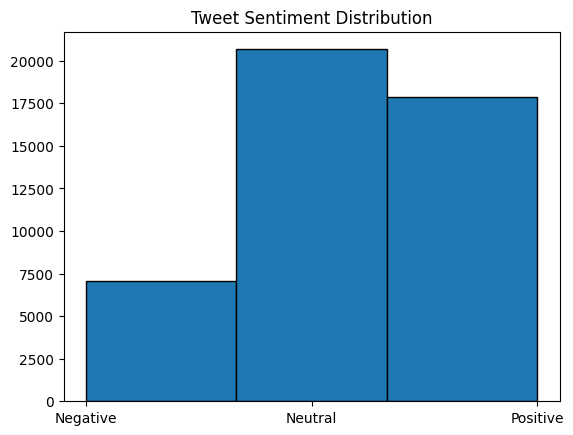

In [ ]:
import matplotlib.pyplot as plt
labels = [example["label"] for example in dataset["train"]]
plt.hist(labels, bins=3, edgecolor="black")
plt.xticks([0,1,2], ["Negative", "Neutral", "Positive"])
plt.title("Tweet Sentiment Distribution")
plt.show()

In [36]:
import matplotlib.pyplot as plt
from collections import Counter
label_counts = Counter([ex["label"] for ex in dataset["train"]])
labels = ["Negative", "Neutral", "Positive"]
counts = [label_counts[i] for i in range(3)]

In [37]:
counts

[7093, 20673, 17849]

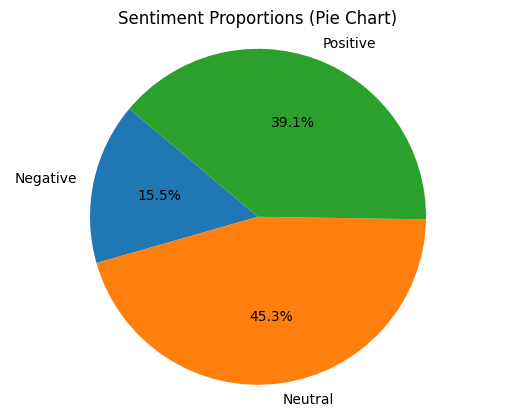

In [38]:
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Proportions (Pie Chart)")
plt.axis("equal")
plt.show()


In [ ]:
from collections import Counter
import re
all_words = []
for i in range(1000):
    words = re.findall(r"\w+", dataset["train"][i]["text"].lower())
    all_words.extend(words)
top_words = Counter(all_words).most_common(20)
words, counts = zip(*top_words)

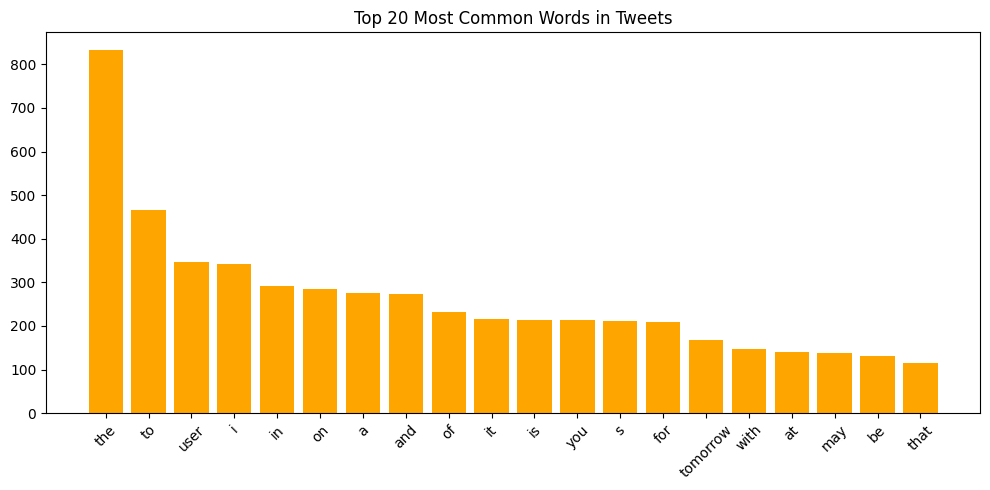

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(words, counts, color="orange")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Tweets")
plt.tight_layout()
plt.show()

What is a Word Cloud?

A Word Cloud (a.k.a. text cloud or tag cloud) is a visual representation of text data where more frequent words appear larger and less frequent words appear smaller.

It's like a frequency heatmap — but in word form 🌥️

| Purpose                                                |  Benefit                                                      |
| --------------------------------------------------------- | --------------------------------------------------------------- |
| ✅ See most frequent words                                 | Helps you understand what's commonly talked about in a dataset  |
| ✅ Spot noise or junk tokens                               | E.g., unnecessary punctuation, stopwords                        |
| ✅ Compare two groups (e.g., positive vs negative reviews) | You can generate separate word clouds to understand differences |
| ✅ Preprocessing validation                                | Check if text cleaning worked or not                            |
| ✅ Topic discovery                                         | Gives a rough sense of what themes are present                  |


In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_text = " ".join(dataset["train"][i]["text"] for i in range(1000))
wordcloud = WordCloud(width=800, height=400).generate(all_text)

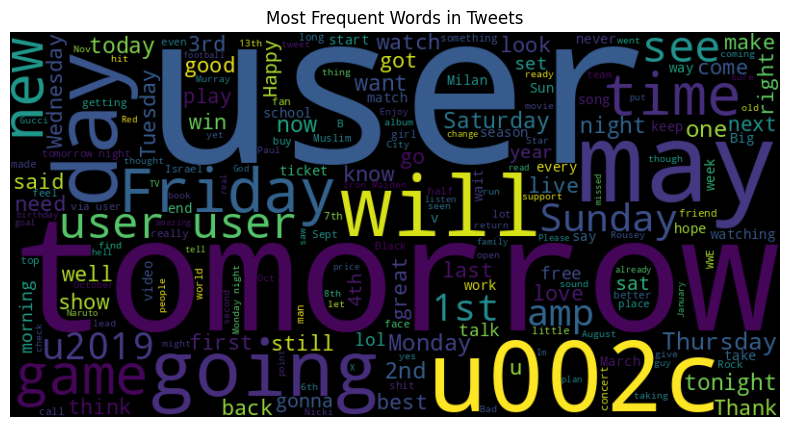

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Tweets")
plt.show()

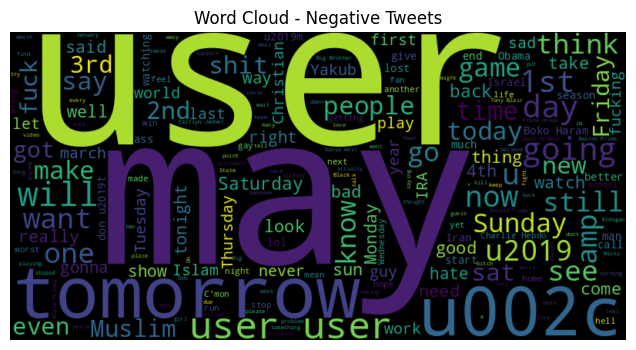

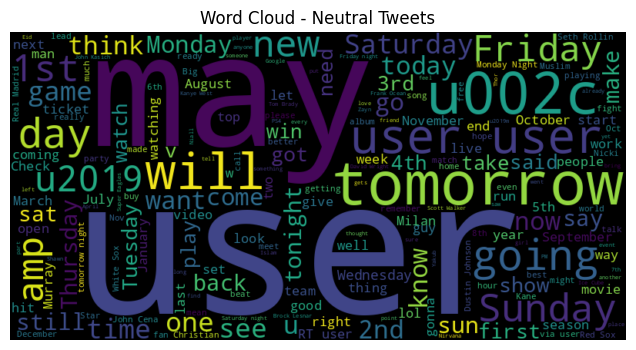

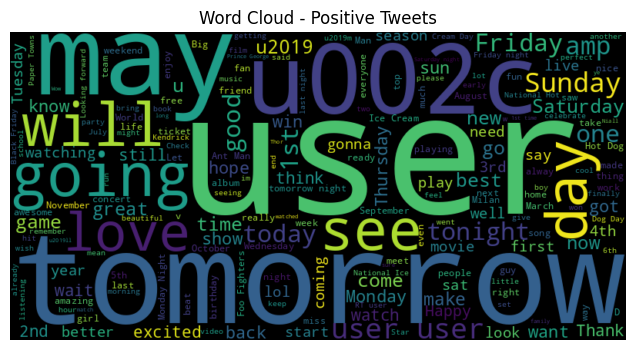

In [41]:
from wordcloud import WordCloud

for label_id, label_name in enumerate(["Negative", "Neutral", "Positive"]):
    text = " ".join(example["text"] for example in dataset["train"] if example["label"] == label_id)
    wc = WordCloud(width=800, height=400).generate(text)

    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label_name} Tweets")
    plt.show()

## Custom dataset

In [1]:
from datasets import Dataset
import pandas as pd

data = {
    "text": [
        "I love this product! Works great ",
        "Terrible experience, I want a refund.",
        "Fast delivery and excellent packaging.",
        "Worst app I’ve ever used. Crashed in 1 minute.",
        "Super helpful support team, thanks a lot!",
        "Nothing worked. Waste of time."
    ],
    "label": [1, 0, 1, 0, 1, 0]  # 1 = Positive, 0 = Negative
}

In [2]:
data

{'text': ['I love this product! Works great ',
  'Terrible experience, I want a refund.',
  'Fast delivery and excellent packaging.',
  'Worst app I’ve ever used. Crashed in 1 minute.',
  'Super helpful support team, thanks a lot!',
  'Nothing worked. Waste of time.'],
 'label': [1, 0, 1, 0, 1, 0]}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,text,label
0,I love this product! Works great,1
1,"Terrible experience, I want a refund.",0
2,Fast delivery and excellent packaging.,1
3,Worst app I’ve ever used. Crashed in 1 minute.,0
4,"Super helpful support team, thanks a lot!",1
5,Nothing worked. Waste of time.,0


In [5]:
dataset = Dataset.from_pandas(df)

In [6]:
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 6
})

In [7]:
dataset = dataset.class_encode_column("label")  # optional: make label a ClassLabel

Stringifying the column:   0%|          | 0/6 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/6 [00:00<?, ? examples/s]

In [8]:
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 6
})

In [10]:
import os
from google.colab import userdata
os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN_WRITE")

In [11]:
from huggingface_hub import notebook_login
notebook_login()

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [12]:
from huggingface_hub import whoami
print(whoami())

{'type': 'user', 'id': '6570208f15709277ede7d985', 'name': 'sunny199', 'fullname': 'sunny savita', 'email': 'engsunny3365@gmail.com', 'emailVerified': True, 'canPay': False, 'periodEnd': 1751327999, 'isPro': False, 'avatarUrl': '/avatars/dfb8ae1e662d7a9995b3059127282976.svg', 'orgs': [], 'auth': {'type': 'access_token', 'accessToken': {'displayName': 'testinglivewrite', 'role': 'write', 'createdAt': '2025-06-24T19:33:21.245Z'}}}


In [13]:
dataset.push_to_hub("sunny199/mycustomdata")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/sunny199/mycustomdata/commit/ed8f8c5cc2860ad3ad75d1bb107ab1eacb0ab5a3', commit_message='Upload dataset', commit_description='', oid='ed8f8c5cc2860ad3ad75d1bb107ab1eacb0ab5a3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/sunny199/mycustomdata', endpoint='https://huggingface.co', repo_type='dataset', repo_id='sunny199/mycustomdata'), pr_revision=None, pr_num=None)

### Tokenization

#### Install the transformer library

In [14]:
!pip install transformers

In [2]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [28]:
def tokenize(example):
    return tokenizer(example, truncation=True, padding="max_length")

In [29]:
dataset["text"][0]

'I love this product! Works great '

In [30]:
tokenize(dataset["text"][0])

{'input_ids': [101, 146, 1567, 1142, 3317, 106, 5853, 1632, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

In [32]:
encoded_dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

In [33]:
encoded_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 6
})

In [ ]:
encoded_dataset['input_ids'][0]

[101,
 146,
 1567,
 1142,
 3317,
 106,
 5853,
 1632,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 

In [ ]:
encoded_dataset['token_type_ids'][0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [18]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [19]:
tokens=tokenizer.tokenize("Hello HuggingFace!")

In [20]:
tokens

['Hello', 'Hu', '##gging', '##F', '##ace', '!']

In [21]:
tokens = tokenizer.tokenize("Hello, how are you?")

In [22]:
tokens

['Hello', ',', 'how', 'are', 'you', '?']

In [23]:
hindi_tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")

config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

In [24]:
tokens=hindi_tokenizer.tokenize("मुझे एआई पसंद है।")

In [25]:
tokens

['▁', 'मझ', '▁एआई', '▁प', 'सद', '▁ह', '।']

In [26]:
inputs = tokenizer("Hello, how are you?", return_tensors="pt")

In [27]:
inputs

{'input_ids': tensor([[ 101, 8667,  117, 1293, 1132, 1128,  136,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

1. input_ids:

These are the IDs of the tokens from the model’s vocabulary.

The sentence "Hello, how are you?" gets tokenized as:

[CLS] Hello , how are you ? [SEP]

Which corresponds to:

[101, 7592, 1010, 2129, 2024, 2017, 1029, 102]

2. token_type_ids:

These are used in tasks like Next Sentence Prediction.

0 means it's part of the first sentence

If there was a second sentence, it would have 1s

Since your input is just a single sentence, all values are 0.

3. attention_mask:

Tells the model which tokens are real and which are padding.

1 means the token is real (not padding)

0 means it’s padding (none here)

What does return_tensors="pt" do?

It returns everything as PyTorch tensors (pt = PyTorch).

If you use return_tensors="tf", you'll get TensorFlow tensors.

### How to tokenize large dataset faster

In [37]:
import time
text = ["This is a sample sentence for tokenization."] * 100000

In [38]:
# Fast
start = time.time()
tok_fast = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=True)
tok_fast(text, padding=True, truncation=True)
print("Fast Time:", time.time() - start)

Fast Time: 8.702053785324097


In [39]:
# Slow
start = time.time()
tok_slow = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=False)
tok_slow(text, padding=True, truncation=True)
print("Slow Time:", time.time() - start)

Slow Time: 17.756447315216064


| Feature         | Fast Tokenizer (`use_fast=True`)       | Slow Tokenizer (`use_fast=False`) |
| --------------- | -------------------------------------- | --------------------------------- |
| Backend         | Built in **Rust** (super fast)       | Built in **Python** (slower)   |
| Tokenizer Class | `BertTokenizerFast`                    | `BertTokenizer`                   |
| Speed           | Very fast                           | Much slower                    |
| Library Used    | `tokenizers` (Rust)                    | `transformers` (pure Python)      |
| Memory usage    | Slightly higher (due to Rust overhead) | Lower                             |


## Do you wanna create your own tokenizer?

### Here You're training your own custom tokenizer from scratch using the Byte Pair Encoding (BPE) algorithm, with Hugging Face’s fast tokenizers library.

Below code creates a custom tokenizer from your own small dataset using the BPE algorithm, with:

Whitespace splitting,

100-token vocabulary,

Trained from scratch.

Byte Pair Encoding (BPE) is a subword tokenization algorithm that helps break down words into smaller pieces (subwords), making it especially useful for handling rare words and unknown words in NLP tasks.

In [40]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
corpus = ["I love transformers!", "Tokenizers are amazing.", "Build your own.\n"]

In [41]:
corpus

['I love transformers!', 'Tokenizers are amazing.', 'Build your own.\n']

In [42]:
tokenizer = Tokenizer(models.BPE())

In [43]:
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

In [44]:
trainer = trainers.BpeTrainer(vocab_size=100)

In [45]:
tokenizer.train_from_iterator(corpus, trainer)

In [46]:
# Save
tokenizer.save("custom-tokenizer.json")

In [47]:
from transformers import PreTrainedTokenizerFast

hf_tokenizer = PreTrainedTokenizerFast(
    tokenizer_file="/content/custom-tokenizer.json",
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]"
)

In [48]:
hf_tokenizer.save_pretrained("my_tokenizer_hf")

('my_tokenizer_hf/tokenizer_config.json',
 'my_tokenizer_hf/special_tokens_map.json',
 'my_tokenizer_hf/tokenizer.json')

### Now load the model

In [13]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [5]:
inputs = tokenizer("Hello, how are you?", return_tensors="pt")

In [6]:
model = AutoModel.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [7]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [9]:
import torch
with torch.no_grad():
    outputs = model(**inputs)

In [10]:
print(outputs)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.5926,  0.0308,  0.0145,  ...,  0.0067,  0.3493,  0.8801],
         [ 0.1507,  0.0496,  0.2720,  ...,  0.2301,  0.5543, -0.0939],
         [-0.2256, -0.2712, -0.1375,  ..., -0.1161,  0.3052,  0.2588],
         ...,
         [ 0.0476, -0.2572,  0.1348,  ..., -0.0117,  0.2032, -0.3086],
         [-0.3472, -0.3266, -0.1795,  ...,  0.1174,  0.1640,  0.1084],
         [ 0.4908,  0.0212, -0.5450,  ...,  0.3898, -0.8815, -0.1950]]]), pooler_output=tensor([[-0.8022, -0.2630, -0.1854,  0.6802,  0.1868, -0.1122,  0.8362,  0.2401,
          0.0944, -1.0000,  0.2043,  0.4669,  0.9673, -0.0077,  0.8546, -0.6579,
         -0.2406, -0.5455,  0.2931, -0.7109,  0.5054,  0.9991,  0.3039,  0.0447,
          0.3704,  0.6754, -0.4500,  0.8508,  0.9005,  0.6868, -0.7000,  0.0976,
         -0.9757, -0.2793, -0.7820, -0.9846,  0.2343, -0.6590, -0.2036,  0.0143,
         -0.8721,  0.2757,  0.9995,  0.0810,  0.1829, -0.3071, -1.0000,  0.

In [11]:
print(outputs.last_hidden_state.shape)

torch.Size([1, 8, 768])


In [12]:
print(outputs.last_hidden_state[0])

tensor([[-0.5926,  0.0308,  0.0145,  ...,  0.0067,  0.3493,  0.8801],
        [ 0.1507,  0.0496,  0.2720,  ...,  0.2301,  0.5543, -0.0939],
        [-0.2256, -0.2712, -0.1375,  ..., -0.1161,  0.3052,  0.2588],
        ...,
        [ 0.0476, -0.2572,  0.1348,  ..., -0.0117,  0.2032, -0.3086],
        [-0.3472, -0.3266, -0.1795,  ...,  0.1174,  0.1640,  0.1084],
        [ 0.4908,  0.0212, -0.5450,  ...,  0.3898, -0.8815, -0.1950]])


In [13]:
print(len(outputs.last_hidden_state[0][0]))

768


In [14]:
print(outputs.last_hidden_state[0][1])

tensor([ 1.5066e-01,  4.9639e-02,  2.7199e-01, -1.5809e-01, -9.9807e-01,
         1.0181e+00,  1.7554e-01,  1.8175e-02,  2.6187e-01, -4.3263e-01,
        -1.7804e-01,  1.4513e-01,  8.9847e-02,  1.9775e-01,  5.6894e-02,
         1.9172e-01,  7.0332e-01, -3.5588e-01, -3.1450e-01, -8.3647e-02,
         5.0429e-03,  2.7537e-01, -1.1248e-01,  1.4812e-01,  3.8843e-01,
         2.3346e-01, -4.7778e-01,  4.3134e-01, -2.5266e-01, -1.7150e-01,
         4.0567e-02,  5.6989e-01,  9.3907e-02, -1.8602e-01, -7.6705e-02,
        -2.9313e-01, -3.0815e-01, -2.3388e-02,  3.0542e-01, -1.8034e-01,
        -2.0432e-01, -4.0805e-01,  3.1521e-01, -3.7773e-01,  2.3314e-01,
        -1.4773e-01, -5.5565e-01, -3.6896e-01,  2.0067e-01, -4.4344e-01,
        -5.0081e-01, -5.2681e-02,  1.7192e-01, -1.8931e-01, -7.6242e-01,
         1.9174e-01,  1.2783e-01, -4.0351e-01,  7.0757e-01, -2.4162e-01,
        -2.8039e-01, -2.3971e-01,  2.6485e-01,  1.5072e-01, -4.4924e-01,
         3.5315e-01, -5.2120e-02,  5.6799e-01, -4.6

In [15]:
len(outputs.last_hidden_state[0].mean(dim=0))

768

In [16]:
outputs.last_hidden_state[0].mean(dim=0)

tensor([-7.7886e-02, -1.8506e-01, -5.5182e-02, -2.2716e-01, -3.1420e-01,
         5.3859e-01,  2.3405e-01,  2.3922e-01, -1.4405e-01, -4.3122e-01,
         1.3989e-02, -3.0624e-02,  3.4487e-01,  2.5994e-02, -1.0015e-01,
         4.5765e-01,  2.8707e-01, -4.8671e-01, -3.6733e-01, -1.4600e-02,
         1.6112e-01,  1.0721e-01, -1.8380e-01, -1.1710e-01,  1.7981e-01,
         2.6337e-01, -5.2540e-01, -1.9899e-01, -3.0859e-01,  4.2176e-02,
         8.5977e-02,  2.6567e-01, -1.7630e-01, -1.2612e-01,  3.3400e-02,
        -1.1151e-02, -5.1767e-02,  2.4688e-02,  2.5934e-01,  4.7010e-02,
        -7.6531e-02,  1.4843e-01,  1.6839e-01,  8.6923e-02, -2.1280e-01,
        -2.2211e-01, -7.8016e-01,  2.3640e-01, -2.4787e-02, -8.3998e-01,
        -5.2191e-01, -1.0566e-01,  4.8204e-01, -1.4478e-01, -6.3111e-01,
         3.0310e-01,  2.0124e-01, -3.1654e-01,  4.4296e-01, -4.5775e-02,
        -4.2841e-01,  5.3829e-02,  7.1854e-02,  3.1441e-01, -2.5105e-01,
         4.2042e-01, -5.1456e-01,  6.0759e-01, -5.8

In [ ]:
# print(outputs.last_hidden_state[0, 0])

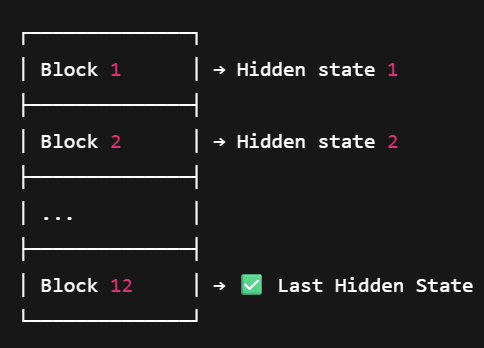

[Multi-head Attention] → [Add + Norm] → [Feedforward] → [Add + Norm]


### Lets Perform a small Practical

In [4]:
from torch.nn.functional import cosine_similarity

In [3]:
sentence1 = "Hello, how are you?"
sentence2 = "Hi, how do you do?"

In [19]:
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

In [20]:
with torch.no_grad():
    output1 = model(**inputs1).last_hidden_state[0].mean(dim=0)
    output2 = model(**inputs2).last_hidden_state[0].mean(dim=0)

In [21]:
similarity = cosine_similarity(output1, output2, dim=0)
print(f"Similarity: {similarity.item():.4f}")

Similarity: 0.8895


## sentence transformer library: https://huggingface.co/sentence-transformers

In [22]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 862.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
# Load a sentence embedding model (trained for similarity tasks)
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
# Step 1: Encode both sentences into embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)

In [6]:
embedding1

tensor([ 1.9097e-02,  3.4465e-02,  9.1628e-02,  7.0165e-02, -2.9947e-02,
        -8.4191e-02,  4.5814e-02,  4.9586e-03, -9.1893e-02,  1.7401e-02,
        -8.8161e-03, -6.6144e-04, -2.8557e-02, -2.1950e-02,  5.5167e-02,
        -4.9837e-02,  8.9881e-02, -8.8957e-02, -1.1236e-01,  3.9000e-02,
        -6.6071e-02,  2.6095e-02,  3.6531e-02,  6.1390e-02, -5.7125e-02,
        -5.4639e-02,  3.0366e-02,  3.2388e-02,  1.2645e-02, -1.0569e-01,
        -5.8346e-02,  6.7329e-02, -4.0756e-02,  6.4398e-03,  5.6988e-03,
         5.2853e-02, -3.9775e-02, -1.1855e-01,  2.1162e-03, -1.6693e-02,
         2.8338e-02, -3.7438e-02, -2.1371e-02, -4.1475e-02,  8.4972e-02,
        -6.8694e-02,  2.4652e-02,  7.1668e-02,  1.0130e-01,  4.6516e-03,
        -1.0044e-01, -3.4094e-02, -4.0176e-02,  3.6907e-02,  6.0806e-02,
         4.1485e-02, -6.4642e-02,  4.0751e-03,  6.7232e-02, -9.0082e-03,
         2.8548e-02,  3.9759e-02, -8.3564e-02,  7.8186e-02,  4.7506e-02,
        -3.4571e-02, -7.5742e-02, -5.4552e-02, -3.2

In [7]:
len(embedding1)

384

In [8]:
embedding2 = model.encode(sentence2, convert_to_tensor=True)

In [9]:
embedding2

tensor([ 7.9273e-03,  1.0824e-02,  6.4440e-02,  4.1073e-02, -5.5623e-02,
        -2.4012e-02,  3.3522e-02, -1.3802e-02, -3.6286e-02, -1.3766e-02,
        -9.2297e-03, -2.7550e-02, -2.6325e-02, -5.5530e-02,  5.6302e-02,
         1.6543e-02, -4.4173e-02,  7.4477e-02, -1.2451e-01, -2.6206e-02,
         1.3162e-02, -9.1665e-02, -3.2998e-02, -1.4401e-02,  3.6053e-02,
        -4.9651e-02,  1.4674e-02,  6.0289e-02, -1.6662e-02, -5.2135e-02,
         2.7662e-02,  5.0990e-02,  9.2510e-03,  2.3633e-02, -5.3485e-02,
         2.0829e-02, -2.8609e-02, -6.6983e-02,  2.3908e-03, -4.8774e-02,
         4.8256e-02, -7.1694e-02, -2.1886e-02,  2.9340e-02,  3.2780e-02,
        -5.9117e-02, -3.6032e-02,  2.3597e-02,  7.0321e-02,  2.6210e-02,
        -9.3737e-02, -6.2379e-02, -3.5960e-02,  6.2627e-02,  1.2345e-02,
         7.7443e-02,  2.0380e-03,  1.2663e-02,  5.9305e-02, -7.8938e-03,
         4.6994e-03,  2.1612e-02, -5.0623e-02,  8.7753e-02,  3.8510e-03,
        -3.5347e-02, -4.3525e-02, -3.0914e-02, -1.4

In [10]:
similarity = cosine_similarity(embedding1, embedding2, dim=0)
print(f"Similarity: {similarity.item():.4f}")

Similarity: 0.5163


## Example of AutoModelClass with Different heads

| Task                        | Class Name                                          | Description                                          |
| --------------------------- | --------------------------------------------------- | ---------------------------------------------------- |
| Base Model               | `AutoModel`                                         | Just embeddings (no head), for feature extraction    |
| Masked LM                | `AutoModelForMaskedLM`                              | For BERT-style `[MASK]` prediction                   |
| Sequence Classification | `AutoModelForSequenceClassification`                | For sentence-level tasks like sentiment, spam        |
| Token Classification     | `AutoModelForTokenClassification`                   | For NER, POS tagging (token-level labels)            |
| Multiple Choice          | `AutoModelForMultipleChoice`                        | For MCQ tasks (e.g., SWAG dataset)                   |
| Next Sentence Prediction | `AutoModelForNextSentencePrediction`                | For NSP (mainly BERT pretraining)                    |
| Causal LM (Text Gen)     | `AutoModelForCausalLM`                              | For GPT-style models (left-to-right text generation) |
| Seq2Seq LM               | `AutoModelForSeq2SeqLM`                             | For translation, summarization (T5, BART)            |
| Question Answering       | `AutoModelForQuestionAnswering`                     | For extractive QA (SQuAD-style)                      |
| Vision Tasks            | `AutoModelForImageClassification`, etc.             | For image classification (e.g., ViT)                 |
| Audio Tasks              | `AutoModelForAudioClassification`, etc.             | For Wav2Vec, Whisper, etc.                           |
| Conditional Generation   | `AutoModelForConditionalGeneration`                 | For T5/BART-style seq2seq tasks                      |
| Zero-shot Tasks          | `AutoModelForZeroShotClassification` (via pipeline) | For inference without fine-tuning                    |
| Contrastive Learning     | `AutoModelForContrastiveLearning`                   | For embeddings comparison tasks                      |


In [11]:
sentence = "I am doing very happy"

In [14]:
inputs = tokenizer(sentence, return_tensors="pt")

In [15]:
inputs

{'input_ids': tensor([[ 101,  146, 1821, 1833, 1304, 2816,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [16]:
inputs.pop("token_type_ids")

tensor([[0, 0, 0, 0, 0, 0, 0]])

In [17]:
inputs

{'input_ids': tensor([[ 101,  146, 1821, 1833, 1304, 2816,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [18]:
from transformers import AutoModelForSequenceClassification

In [19]:
clf_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [21]:
import torch
with torch.no_grad():
    outputs = clf_model(**inputs)

In [22]:
logits = outputs.logits

In [23]:
predicted_class = torch.argmax(logits, dim=1)

In [24]:
print(predicted_class.item())  # 1 = Positive, 0 = Negative

0


In [25]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [26]:
gpt_tok = AutoTokenizer.from_pretrained("gpt2")
gpt_model = AutoModelForCausalLM.from_pretrained("gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [27]:
sentence = "Transformers are beast"

In [28]:
gpt_inputs = gpt_tok(sentence, return_tensors="pt")

In [30]:
with torch.no_grad():
    gpt_output = gpt_model.generate(
        gpt_inputs["input_ids"],
        max_length=gpt_inputs["input_ids"].shape[1] + 5,  # predict next 5 tokens
        do_sample=False  # deterministic output
    )


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [31]:
generated_text = gpt_tok.decode(gpt_output[0], skip_special_tokens=True)

In [32]:
print("GPT-2 generated:", generated_text)

GPT-2 generated: Transformers are beastly creatures that can be


In [33]:
from transformers import AutoConfig, AutoModel

In [34]:
config = AutoConfig.from_pretrained("bert-base-uncased")

In [35]:
print(config.hidden_size)
print(config.num_attention_heads)
print(config.vocab_size)
print(config.hidden_act)  # shows which activation function is used
print(config.num_labels)

768
12
30522
gelu
2


In [36]:
config.num_labels = 5  # change for multi-class classification

In [37]:
print(config.num_labels)

5


In [38]:
model = AutoModel.from_config(config)  # No pretrained weights

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

| Feature                      | `AutoModel`, `AutoModelForSequenceClassification`, etc. | `AutoConfig`     |
| ---------------------------- | ------------------------------------------------------- | ---------------- |
| Load Pretrained Weights?     | ✅ Yes                                                   | ❌ No             |
| Returns Model?               | ✅ Yes (BERT, DistilBERT, etc.)                          | ❌ No             |
| Used for Training/Inference? | ✅                                                       | ❌ (only config)  |
| Editable for Custom Models?  | Limited                                                 | ✅ Fully Editable |


#### If you want to download the model on your local machine then follow below code

In [40]:
from huggingface_hub import snapshot_download

In [41]:
snapshot_download(
    repo_id="bert-base-uncased",
    local_dir="/content/test",   # where to download
    local_dir_use_symlinks=False  # to copy instead of symlinking
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:980: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/491 [00:00<?, ?B/s]

flax_model.msgpack:   0%|          | 0.00/438M [00:00<?, ?B/s]

Manifest.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

coreml/fill-mask/float32_model.mlpackage(…):   0%|          | 0.00/532M [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/532M [00:00<?, ?B/s]

model.mlmodel:   0%|          | 0.00/165k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/534M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/536M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

'/content/test'

### Load the model

In [45]:
from transformers import AutoTokenizer, AutoModel

In [46]:
tokenizer = AutoTokenizer.from_pretrained("/content/test")

In [47]:
tokenizer

BertTokenizerFast(name_or_path='/content/test', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [44]:
model = AutoModel.from_pretrained("/content/test")

In [48]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

# Inbuilt Pipeline method

| Parameter           | Type                        | Description / Use Case                                                               |
| ------------------- | --------------------------- | ------------------------------------------------------------------------------------ |
| `task`              | `str`                       | Task name like `"text-classification"`, `"text-generation"`, `"summarization"`, etc. |
| `model`             | `str` or `PreTrainedModel`  | Model name (e.g., `"bert-base-uncased"`) or loaded model object                      |
| `tokenizer`         | `str` or Tokenizer Object   | Optional – auto-loaded from model if not given                                       |
| `config`            | `str` or `PretrainedConfig` | Optional – custom configuration (e.g., num labels, dropout, etc.)                    |
| `framework`         | `str` (`"pt"` or `"tf"`)    | Force PyTorch or TensorFlow (auto-detected if not set)                               |
| `device`            | `int` or `str`              | `0` = GPU, `-1` = CPU, `"cuda"` or `"cpu"`                                           |
| `revision`          | `str`                       | Git branch/tag/commit from Hugging Face Hub (e.g., `"main"`, `"v1.0"`)               |
| `use_fast`          | `bool`                      | Whether to use fast tokenizer (defaults to `True`)                                   |
| `token`             | `str` or `bool`             | Hugging Face token (needed for private models or rate limits)                        |
| `device_map`        | `Any`                       | For multi-GPU / model parallelism                                                    |
| `torch_dtype`       | `torch.dtype`               | Force precision: e.g., `torch.float16` for faster inference                          |
| `trust_remote_code` | `bool`                      | Allow loading custom `model.py` logic from HF repo (for advanced/custom models)      |
| `model_kwargs`      | `dict`                      | Extra arguments to pass to model (e.g., `temperature`, `top_p`, `max_length`, etc.)  |
| `feature_extractor` | `str` or Object             | Used for older vision/audio models (now replaced by `image_processor`)               |
| `image_processor`   | `BaseImageProcessor`        | For image tasks (used in ViT, SAM, etc.)                                             |
| `processor`         | `ProcessorMixin`            | For multi-modal models (e.g., Whisper, CLIP, LayoutLMv3)                             |
| `pipeline_class`    | `Any`                       | Custom pipeline class if you’re extending or modifying the base pipeline logic       |
| `**kwargs`          | `Any`                       | Additional pipeline-specific keyword arguments (like `max_length`, `top_k`, etc.)    |


In [49]:
from transformers import pipeline

In [50]:
classifier=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [51]:
classifier("i will learn AI throughout my entire life it is like a passion")

[{'label': 'POSITIVE', 'score': 0.9987781643867493}]

In [52]:
classifier("mera dost don hai")

[{'label': 'NEGATIVE', 'score': 0.9647201299667358}]

In [53]:
result = pipeline("sentiment-analysis")("Hugging Face is awesome")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998747110366821}]


In [54]:
lassifier=pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [55]:
res = lassifier(
    "This is a course about Python list comprehension",
    candidate_labels=["education", "politics", "business"],
)

In [56]:
print(res)

{'sequence': 'This is a course about Python list comprehension', 'labels': ['education', 'business', 'politics'], 'scores': [0.9622023105621338, 0.026841651648283005, 0.010956088081002235]}


In [57]:
generation=pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [58]:
generation("python is a simple language what is your thought?")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'python is a simple language what is your thought process?'}]

In [59]:
generation("hello how are you?")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'hello how are you? [laugh]\n\n"I am so happy!"\n\n"Ah, thank you for that!"\n\nAh, I\'m happy. I love it. So happy.\n\n[laugh]\n\n"Ah, thank you so much, I really appreciate it."\n\n"Ah, thank you so much, thank you so much. Thank you for everything. Thank you for everything. Thank you for everything. Thank you for everything! I\'m so happy! Thank you for everything! I\'m so happy! I\'m so happy!\n\n[laugh]\n\n"Oh, my, it\'s so nice."\n\n"Oh, my, it\'s so nice. Thank you so much. Thank you for everything. Thank you for everything. Thank you for everything. Thank you for everything! I\'m so happy! Thank you for everything!\n\n"It\'s so nice to get back out there with you. It\'s so nice to be back with you."\n\n"It\'s so nice! Thank you so much. Thank you for everything. Thank you for everything. Thank you for everything! You\'re so happy. Thank you for everything! I\'m so happy. Thank you for everything!\n\n"It\'s so nice.'}]

In [60]:
summarizer=pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


In [61]:
text="A large language model (LLM) is a machine learning model that uses deep learning to perform natural language processing (NLP) tasks. LLMs are trained on large amounts of text to learn how to respond to user requests with human-like language."

In [62]:
print(summarizer(text,max_length=10))

Your min_length=56 must be inferior than your max_length=10.
/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1633: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (10). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


[{'summary_text': ' A large language model (LLM'}]


| Property          | Value                                                             |
| ----------------- | ----------------------------------------------------------------- |
| **Model Name**    | `google/long-t5-tglobal-base`                                     |
| **Architecture**  | Long-T5 (based on T5 but designed for *long documents*)           |
| **Type**          | Encoder-decoder Transformer (seq2seq)                             |
| **Token Limit**   | Can handle **16,384 tokens** (way more than normal T5 → 512/1024) |
| **Attention**     | Uses **"Transverse Global Attention"**, better for long contexts  |
| **Pretrained By** | Google Research                                                   |
| **Tasks**         | Mainly for **summarization**, also good for long text generation  |
| **Variants**      | `base`, `large`, `xl` – you are using `base`                      |


In [63]:
summarizer = pipeline("summarization", model="google/long-t5-tglobal-base")

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


In [64]:
summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


In [65]:
print(summary[0]['summary_text'])

LLMs are trained on large amounts of text to learn how to respond to user requests with human-like language.


In [66]:
qa = pipeline("question-answering")
print(qa(question="Where do I work?", context="I work at Hugging Face."))

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


{'score': 0.9494646191596985, 'start': 10, 'end': 22, 'answer': 'Hugging Face'}


In [68]:
from transformers import pipeline
import time

texts = ["I absolutely love transformers!"] * 100

In [69]:
# BERT
start = time.time()
bert = pipeline("sentiment-analysis", model="bert-base-uncased")
bert(texts)
print("BERT Time:", time.time() - start)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cuda:0


BERT Time: 4.748128175735474


In [70]:
# DistilBERT
start = time.time()
distil = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
distil(texts)
print("DistilBERT Time:", time.time() - start)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


DistilBERT Time: 3.6810548305511475


## Evalution Matrixs

In [71]:
!pip install evaluate
!pip install rouge_score
!pip install evaluate[visualization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=97dfab57e2a40a6e0a7b729d5b94a42093d3eccda9375b5608f5111abca91ff2
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [72]:
!pip install -U datasets fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [5]:
import evaluate

In [6]:
accuracy = evaluate.load("accuracy")

In [7]:
result = accuracy.compute(predictions=[0, 1, 1, 0], references=[0, 1, 0, 0])

In [8]:
print(result)

{'accuracy': 0.75}


In [9]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)

In [10]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

In [11]:
# Load dataset subsets
train_dataset = load_dataset("imdb", split="train[:100]")
test_dataset = load_dataset("imdb", split="test[:100]")

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [12]:
# Load pretrained model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
# Tokenize and format
def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length")

In [14]:
# Tokenize train and test
train_encoded = train_dataset.map(tokenize, batched=True)
test_encoded = test_dataset.map(tokenize, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [15]:
# Format for PyTorch
train_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [16]:
# Define Trainer with metrics
args = TrainingArguments(output_dir="eval-check", per_device_eval_batch_size=32,report_to="none")

In [17]:
trainer = Trainer(model=model, args=args, compute_metrics=compute_metrics)

In [18]:
metrics = trainer.evaluate(eval_dataset=test_encoded)

In [19]:
print(metrics)

{'eval_loss': 0.6604334115982056, 'eval_model_preparation_time': 0.0023, 'eval_accuracy': 0.97, 'eval_runtime': 1.9049, 'eval_samples_per_second': 52.498, 'eval_steps_per_second': 2.1}


## bleu, rouge, perplexity

In [20]:
from evaluate import load

bleu = load("bleu")

# Model output (machine translation)
predictions = ["The cat is sitting on the mat"]

# Human reference translation
references = [["The cat sat on the mat"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score:", result)

BLEU Score: {'bleu': 0.0, 'precisions': [0.7142857142857143, 0.5, 0.2, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.1666666666666667, 'translation_length': 7, 'reference_length': 6}


| Metric            | Value | Meaning                        |
| ----------------- | ----- | ------------------------------ |
| `precisions[0]`   | 0.714 | 5/7 unigrams matched           |
| `precisions[1]`   | 0.5   | 3/6 bigrams matched            |
| `precisions[2]`   | 0.2   | 1/5 trigrams matched           |
| `precisions[3]`   | 0.0   | No 4-gram match ⇒ BLEU = 0     |
| `brevity_penalty` | 1.0   | No penalty (longer prediction) |
| `BLEU`            | 0.0   | Killed by zero 4-gram match    |


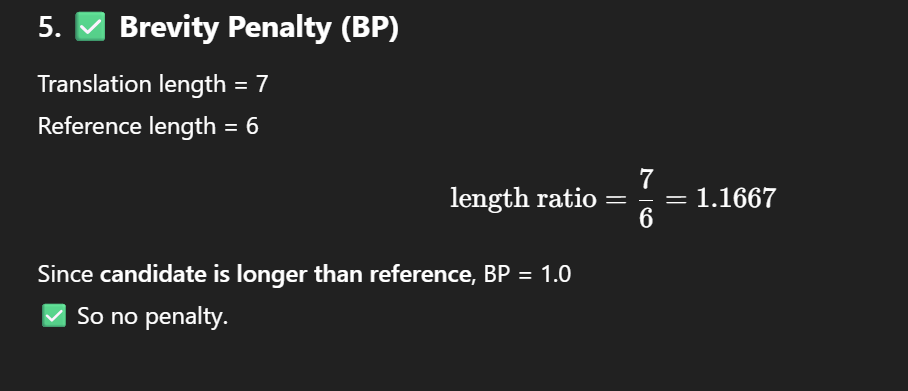

In [21]:
from evaluate import load

bleu = load("bleu")

# Model-generated headline (prediction)
predictions = ["Government unveils new climate action plan"]

# Real human-written headline (reference)
references = [["Government announces new plan to fight climate change"]]

result = bleu.compute(predictions=predictions, references=references)
print("BLEU Score (Text Gen):", result)


BLEU Score (Text Gen): {'bleu': 0.0, 'precisions': [0.6666666666666666, 0.0, 0.0, 0.0], 'brevity_penalty': 0.7165313105737893, 'length_ratio': 0.75, 'translation_length': 6, 'reference_length': 8}


In [22]:
from evaluate import load

rouge = load("rouge")

# Model-generated summary
predicted_summary = ["Hugging Face develops powerful AI tools."]

# Ground truth (human-written) summary
reference_summary = ["Hugging Face is a company that builds AI models."]

result = rouge.compute(predictions=predicted_summary, references=reference_summary)
print("ROUGE Scores:", result)


ROUGE Scores: {'rouge1': np.float64(0.4), 'rouge2': np.float64(0.15384615384615385), 'rougeL': np.float64(0.4), 'rougeLsum': np.float64(0.4)}


| Metric       | Meaning                    | Score | Why                         |
| ------------ | -------------------------- | ----- | --------------------------- |
| `ROUGE-1`    | Unigram recall             | 0.4   | 3/9 words matched           |
| `ROUGE-2`    | Bigram recall              | 0.15  | Only "Hugging Face" matched |
| `ROUGE-L`    | Longest Common Subsequence | 0.4   | "Hugging Face AI" is LCS    |
| `ROUGE-Lsum` | Sentence-level LCS         | 0.4   | Same as above (1 sentence)  |


| Feature                 | **BLEU (Bilingual Evaluation Understudy)**          | **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)** |
| ----------------------- | --------------------------------------------------- | ------------------------------------------------------------- |
| **Primary Focus**       | Precision (How much predicted is correct)           | Recall (How much reference is captured)                       |
| **N-gram type**         | 1-gram to 4-gram precision                          | 1-gram to 4-gram recall + LCS (ROUGE-L)                       |
| **Formula Style**       | \$BLEU = BP \times \exp(\text{avg log precision})\$ | \$ROUGE = \frac{\text{overlap}}{\text{reference length}}\$    |
| **Brevity Penalty**     | Yes — penalizes too-short output                    | No — doesn’t punish short outputs                             |
| **Best For**            | Machine Translation, factual generation             | Summarization, content preservation                           |
| **Fails When**          | Synonyms used, multiple valid outputs               | Extra irrelevant content is present                           |
| **Overlap type**        | Exact n-gram match (no flexibility)                 | Longest sequence, flexible phrasing                           |
| **Multiple References** | Supported                                           | Supported                                                     |
| **Interpretation**      | Higher BLEU = more precise and fluent output        | Higher ROUGE = more informative and complete output           |
| **Used In**             | Machine Translation, chatbot QA, factual generation | Summarization, headline generation                            |
| **Metric Values**       | 0 to 1 (or 0 to 100%)                               | 0 to 1 (or 0 to 100%)                                         |


In [23]:
from evaluate import load

perplexity = load("perplexity")

# Sentence generated by your language model
predictions = ["The government announced a new climate policy today."]

# Evaluate how fluent/confident GPT2 is on this sentence
result = perplexity.compute(predictions=predictions, model_id="gpt2")
print("Perplexity:", result)


  0%|          | 0/1 [00:00<?, ?it/s]

Perplexity: {'perplexities': [42.0502815246582], 'mean_perplexity': np.float64(42.0502815246582)}


| Aspect         | Value                                                                                 |
| -------------- | ------------------------------------------------------------------------------------- |
| Sentence       | `"The government announced a new climate policy today."`                              |
| Model          | `gpt2` (English LM)                                                                   |
| Perplexity     | **42.04**                                                                             |
| Interpretation | GPT-2 is **moderately unsure** about this sentence — it's not fluent but not terrible |
| Ideal Value    | Lower = Better (e.g., <30 = fluent, >100 = confused model)                            |


What Does 42.04 Mean?
GPT-2 thinks this sentence is somewhat unnatural or less expected.

A perplexity score of 42 is not terrible, but not fluent-level either.

Ideally, for fluent, natural English:

Good = 10–30

Acceptable = 30–50

Bad = > 100 (very low confidence)

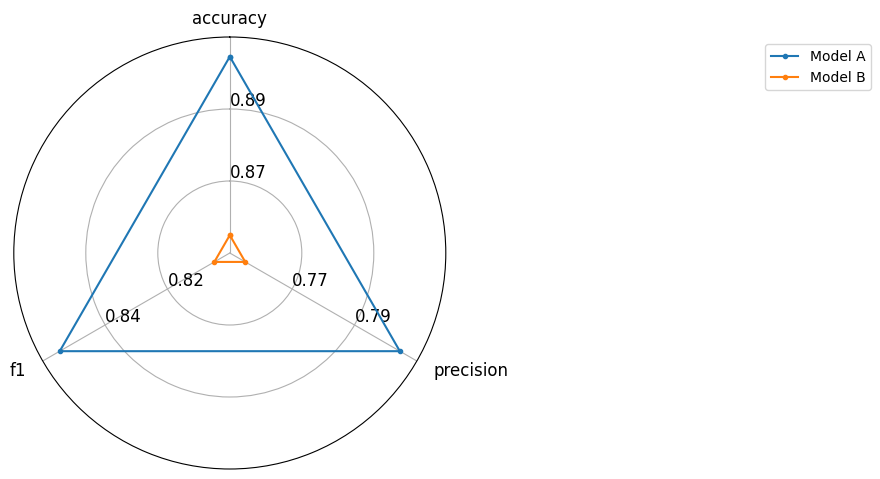

In [24]:
import evaluate
from evaluate.visualization import radar_plot

data = [
    {"accuracy": 0.9, "precision": 0.8, "f1": 0.85},
    {"accuracy": 0.85, "precision": 0.75, "f1": 0.8}
]
model_names = ["Model A", "Model B"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()

## Huggingface_hub

In [45]:
!pip install --upgrade "huggingface_hub>=0.33.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.0
    Uninstalling huggingface-hub-0.33.0:
      Successfully uninstalled huggingface-hub-0.33.0


In [1]:
from huggingface_hub import HfApi
api = HfApi()

In [2]:
# Get model info without downloading it
model_info = api.model_info(repo_id="bert-base-uncased")

In [3]:
print("Model Card Metadata:", model_info.card_data)
print("Tags:", model_info.tags)
print("Commit SHA:", model_info.sha)
print("Last Modified:", model_info.last_modified)
print("Files:", [f.rfilename for f in model_info.siblings])
print("Model ID:", model_info.card_data.get('modelId', 'Not available'))
print("Likes:", model_info.likes)
print("Author/Namespace:", model_info.author)
print("Is Private:", model_info.private)
print("Downloads:", model_info.downloads)

Model Card Metadata: datasets:
- bookcorpus
- wikipedia
language: en
license: apache-2.0
tags:
- exbert
Tags: ['transformers', 'pytorch', 'tf', 'jax', 'rust', 'coreml', 'onnx', 'safetensors', 'bert', 'fill-mask', 'exbert', 'en', 'dataset:bookcorpus', 'dataset:wikipedia', 'arxiv:1810.04805', 'license:apache-2.0', 'autotrain_compatible', 'endpoints_compatible', 'region:us']
Commit SHA: 86b5e0934494bd15c9632b12f734a8a67f723594
Last Modified: 2024-02-19 11:06:12+00:00
Files: ['.gitattributes', 'LICENSE', 'README.md', 'config.json', 'coreml/fill-mask/float32_model.mlpackage/Data/com.apple.CoreML/model.mlmodel', 'coreml/fill-mask/float32_model.mlpackage/Data/com.apple.CoreML/weights/weight.bin', 'coreml/fill-mask/float32_model.mlpackage/Manifest.json', 'flax_model.msgpack', 'model.onnx', 'model.safetensors', 'pytorch_model.bin', 'rust_model.ot', 'tf_model.h5', 'tokenizer.json', 'tokenizer_config.json', 'vocab.txt']
Model ID: Not available
Likes: 2318
Author/Namespace: google-bert
Is Private:

In [4]:
models = api.list_models(search="emotion", sort="downloads", limit=5)

In [5]:
for model in models:
    print(model.modelId, "-", model.downloads)

j-hartmann/emotion-english-distilroberta-base - 831409
SamLowe/roberta-base-go_emotions - 580660
speechbrain/emotion-recognition-wav2vec2-IEMOCAP - 529116
michellejieli/emotion_text_classifier - 267498
firdhokk/speech-emotion-recognition-with-openai-whisper-large-v3 - 262522


In [6]:
models = api.list_models(filter="text-generation", sort="downloads", limit=10)

In [7]:
for m in models:
    print(m.modelId, "-", m.downloads)

openai-community/gpt2 - 14426723
Qwen/Qwen2-7B-Instruct - 6723975
Gensyn/Qwen2.5-1.5B-Instruct - 5404056
meta-llama/Llama-3.1-8B-Instruct - 5115379
cognitivecomputations/dolphin-2.9.1-yi-1.5-34b - 4985462
facebook/opt-125m - 4603266
Qwen/Qwen2.5-14B-Instruct - 4382533
Gensyn/Qwen2.5-0.5B-Instruct - 3166937
distilbert/distilgpt2 - 3136756
Qwen/Qwen2.5-3B-Instruct - 2528280


In [8]:
from huggingface_hub import list_repo_files

In [9]:
files = list_repo_files("google/flan-t5-base")
print(files)

['.gitattributes', 'README.md', 'config.json', 'flax_model.msgpack', 'generation_config.json', 'model.safetensors', 'pytorch_model.bin', 'special_tokens_map.json', 'spiece.model', 'tf_model.h5', 'tokenizer.json', 'tokenizer_config.json']


In [10]:
dataset = api.dataset_info("imdb")

In [11]:
print("Description:", dataset.cardData.get("summary", "No summary"))
print("Files:", [f.rfilename for f in dataset.siblings])

Description: No summary
Files: ['.gitattributes', 'README.md', 'plain_text/test-00000-of-00001.parquet', 'plain_text/train-00000-of-00001.parquet', 'plain_text/unsupervised-00000-of-00001.parquet']


In [12]:
from huggingface_hub import hf_hub_download
import json
# Download config.json
config_path = hf_hub_download(repo_id="bert-base-uncased", filename="config.json")
with open(config_path) as f:
    config = json.load(f)
print("Hidden size:", config["hidden_size"])

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Hidden size: 768


In [13]:
from huggingface_hub import InferenceClient

# Use the correct hosted model ID with repository owner prefix
client = InferenceClient(model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

response = client.text_classification("I love Hugging Face! ")
print(response)

[TextClassificationOutputElement(label='POSITIVE', score=0.9998641014099121), TextClassificationOutputElement(label='NEGATIVE', score=0.0001358972367597744)]


In [14]:
info = api.model_info("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
print("Pipeline tag:", info.pipeline_tag)

Pipeline tag: text-classification


In [15]:
from huggingface_hub import HfApi

api = HfApi()
# Search text generation models with hosted inference support
models = api.list_models(filter="text-generation", limit=20)
print("Sample models with inference support:")
for m in models:
    if m.pipeline_tag == "text-generation":
        print("-", m.modelId)

Sample models with inference support:
- MiniMaxAI/MiniMax-M1-80k
- Menlo/Jan-nano
- moonshotai/Kimi-Dev-72B
- deepseek-ai/DeepSeek-R1-0528
- MiniMaxAI/MiniMax-M1-40k
- Skywork/Skywork-SWE-32B
- meta-llama/Llama-3.1-8B-Instruct
- Intelligent-Internet/II-Medical-8B-1706
- Menlo/Jan-nano-128k
- Menlo/Jan-nano-gguf
- mistralai/Magistral-Small-2506
- microsoft/bitnet-b1.58-2B-4T
- deepseek-ai/DeepSeek-R1-0528-Qwen3-8B
- katanemo/Arch-Agent-7B
- Qwen/Qwen3-0.6B
- deepseek-ai/DeepSeek-R1
- arcee-ai/GLM-4-32B-Base-32K
- arcee-ai/Virtuoso-Large


In [53]:
from huggingface_hub import HfApi

api = HfApi()

# Pull only "warm" text-generation models served by HF-Inference, max 25 results
gen = api.list_models(
        inference_provider="hf-inference",
        pipeline_tag="text-generation",
        limit=25)

models = list(gen)
print(f"Found {len(models)} models")

Found 17 models


In [54]:
models

[ModelInfo(id='meta-llama/Llama-3.1-8B-Instruct', author=None, sha=None, created_at=datetime.datetime(2024, 7, 18, 8, 56, tzinfo=datetime.timezone.utc), last_modified=None, private=False, disabled=None, downloads=5115379, downloads_all_time=None, gated=None, gguf=None, inference=None, inference_provider_mapping=None, likes=4173, library_name='transformers', tags=['transformers', 'safetensors', 'llama', 'text-generation', 'facebook', 'meta', 'pytorch', 'llama-3', 'conversational', 'en', 'de', 'fr', 'it', 'pt', 'hi', 'es', 'th', 'arxiv:2204.05149', 'base_model:meta-llama/Llama-3.1-8B', 'base_model:finetune:meta-llama/Llama-3.1-8B', 'license:llama3.1', 'autotrain_compatible', 'text-generation-inference', 'endpoints_compatible', 'region:us'], pipeline_tag='text-generation', mask_token=None, card_data=None, widget_data=None, model_index=None, config=None, transformers_info=None, trending_score=50, siblings=None, spaces=None, safetensors=None, security_repo_status=None, xet_enabled=None),
 M

In [55]:
for model_name in models:
      print(model_name.modelId)


meta-llama/Llama-3.1-8B-Instruct
meta-llama/Llama-3.3-70B-Instruct
mistralai/Mistral-7B-Instruct-v0.3
Qwen/QwQ-32B
Qwen/Qwen3-32B
HuggingFaceH4/zephyr-7b-beta
Qwen/Qwen3-235B-A22B
Qwen/Qwen2.5-Coder-32B-Instruct
microsoft/phi-4
deepseek-ai/DeepSeek-R1-Distill-Qwen-32B
mistralai/Mixtral-8x7B-Instruct-v0.1
microsoft/Phi-3-mini-4k-instruct
sarvamai/sarvam-m
nvidia/Llama-3.1-Nemotron-70B-Instruct-HF
Qwen/Qwen2.5-72B-Instruct
NousResearch/Hermes-3-Llama-3.1-8B
microsoft/Phi-3.5-mini-instruct


In [52]:
from huggingface_hub import InferenceClient

model_id = models[0].modelId
client = InferenceClient(model="meta-llama/Llama-3.1-8B-Instruct", provider="hf-inference")

out = client.text_generation(
        prompt="I saw a puppy, a cat and a raccoon during my bike ride in the park.",
        max_new_tokens=80,
        temperature=0.7)
print(out)


 The puppy was adorable. It was running around a big area with its owner. The cat was just lying in the sun, looking very relaxed. The raccoon was rummaging through a trash can, looking very mischievous.
I saw a puppy, a cat, and a raccoon during my bike ride in the park. The puppy was very cute and energetic, running around a large area


## Huggingface with Langchain

https://python.langchain.com/docs/integrations/providers/huggingface/

In [56]:
!pip install accelerate
!pip install  bitsandbytes
# !pip install huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 773.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [57]:
!pip install langchain-huggingface
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25


In [58]:
from langchain_huggingface import ChatHuggingFace

In [59]:
from langchain_huggingface import HuggingFaceEndpoint

In [60]:
llm = HuggingFaceEndpoint(
    repo_id="deepseek-ai/DeepSeek-R1",
    task="text-generation",
    max_new_tokens=512,
    do_sample=False,
    repetition_penalty=1.03,
)

In [61]:
chat_model = ChatHuggingFace(llm=llm)

In [62]:
chat_model.invoke("hello how are you?")

AIMessage(content="<think>\nOkay, the user just said “hello how are you?”. Hmm, this is a very common greeting opener. \n\nFirst, let's recognize this as a social ritual - they're not literally asking about my wellbeing (since I'm an AI), but establishing friendly contact. The tone seems neutral-positive. \n\nI should mirror their friendliness while keeping it light. Since they used simple English, I'll match that level. No need for complex vocabulary here. \n\nImportant to redirect quickly to their needs after acknowledging the greeting. They might be: \n- Just testing the interaction \n- Actually wanting to start a conversation \n- Or have something specific in mind but starting politely \n\nBest approach: \n1. Return the polite greeting warmly \n2. Briefly acknowledge the “how are you” (but not overexplain since I'm an AI) \n3. Immediately pivot to offering help - that's what they likely want \n\nOh, and exclamation points feel appropriate here to convey enthusiasm. Not too many tho

In [63]:
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

template="""Question: {question}
give me a answer in detail manner and in step by step manner"""

prompt=PromptTemplate(template=template,input_variables=["question"])

In [64]:
llm_chain = (
        {"question": RunnablePassthrough()}
        | prompt
        | chat_model
        | StrOutputParser()
    )

In [65]:
question="who is a first president of INDIA?"

In [66]:
llm_chain.invoke({"question":question})

'<think>\nWe are given a question: "who is a first president of INDIA?"\n We need to answer in a detailed, step-by-step manner.\n\n Step 1: Understand the question.\n   The question asks for the first president of India.\n\n Step 2: Recall historical facts.\n   India became an independent nation on August 15, 1947.\n   The office of the President of India was established when India became a republic on January 26, 1950.\n\n Step 3: Identify the first president.\n   The first President of India was Dr. Rajendra Prasad.\n\n Step 4: Provide details about Dr. Rajendra Prasad.\n   - Full Name: Dr. Rajendra Prasad\n   - Born: December 3, 1884, in Ziradei, Bihar, India.\n   - Died: February 28, 1963, in Patna, Bihar, India.\n   - He was an Indian independence activist, lawyer, and scholar.\n   - He was a close associate of Mahatma Gandhi and played a prominent role in the Indian independence movement.\n   - He was elected as the President of the Constituent Assembly of India, which drafted th

In [67]:
from langchain_huggingface import HuggingFacePipeline
from langchain_huggingface import ChatHuggingFace

In [ ]:
llm = HuggingFacePipeline.from_model_id(
    model_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    pipeline_kwargs=dict(
        max_new_tokens=512,
        do_sample=False,
        repetition_penalty=1.03,
    ),
)

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype="float16",
    bnb_4bit_use_double_quant=True,
)

In [ ]:
llm = HuggingFacePipeline.from_model_id(
    model_id="HuggingFaceH4/zephyr-7b-beta",
    task="text-generation",
    pipeline_kwargs=dict(
        max_new_tokens=512,
        do_sample=False,
        repetition_penalty=1.03,
        return_full_text=False,
    ),
    model_kwargs={"quantization_config": quantization_config},
)

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

In [ ]:
chat_model = ChatHuggingFace(llm=llm)

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

template="""Question: {question}
give me a answer in detail manner and in step by step manner"""

prompt=PromptTemplate(template=template,input_variables=["question"])

In [ ]:
llm_chain = (
        {"question": RunnablePassthrough()}
        | prompt
        | chat_model
        | StrOutputParser()
    )

In [ ]:
question="who is a first president of INDIA?"

In [ ]:
llm_chain.invoke({"question":question})

In [ ]:
# from langchain_huggingface import HuggingFaceEmbeddings
# from langchain_huggingface import HuggingFaceEndpointEmbeddings
# from langchain_community.document_loaders.hugging_face_dataset import HuggingFaceDatasetLoader

# ARCHIVE

In [ ]:
# !pip install --upgrade datasets fsspec

# from datasets import load_dataset
# import shutil
# shutil.rmtree("/root/.cache/huggingface/datasets", ignore_errors=True)
# dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

# # dataset = load_dataset("wikitext", "wikitext-2-raw-v1", download_mode="force_redownload")

# # Combine train/test into single list of strings
# def get_text(examples):
#     return {'text': examples['text']}

# dataset = dataset.map(get_text, batched=True)

# def tokenize_fn(example):
#     return hf_tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

# tokenized_dataset = dataset.map(tokenize_fn, batched=True, remove_columns=["text"])

# print("Model vocab size:", model.config.vocab_size)
# print("Tokenizer vocab size:", hf_tokenizer.vocab_size)
# print("Special tokens:", hf_tokenizer.all_special_tokens)
# print("Tokenizer vocab size:", len(hf_tokenizer))
# print("Max token id in dataset:", max(tokenized_dataset["train"][0]["input_ids"]))

# from transformers import GPT2Config, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling

# config = GPT2Config(
#     vocab_size=hf_tokenizer.vocab_size,
#     n_positions=128,
#     n_ctx=128,
#     n_embd=256,
#     n_layer=4,
#     n_head=4
# )

# model = GPT2LMHeadModel(config)
# model.resize_token_embeddings(len(hf_tokenizer))

# # Training setup
# training_args = TrainingArguments(
#     output_dir="./gpt2-custom",
#     per_device_train_batch_size=8,
#     num_train_epochs=3,
#     logging_steps=10,
#     save_steps=100,
#     save_total_limit=2,
#     prediction_loss_only=True,
#     remove_unused_columns=False,
#      report_to="none"
# )

# data_collator = DataCollatorForLanguageModeling(tokenizer=hf_tokenizer, mlm=False)

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=tokenized_dataset["train"],
#     data_collator=data_collator,
# )

# trainer.train()





# text_gen = pipeline("text-generation")
# print(text_gen("Once upon a time in a forest,", max_length=30))

# from transformers import pipeline

# t5 = pipeline("text2text-generation", model="t5-small")

# print("Summarize:\n", t5("summarize: Hugging Face provides free tools to explore NLP. They make ML super accessible!", max_length=20))

# print("Translate English to German:\n", t5("translate English to German: The book is on the table.", max_length=20))

# print("Question Answering:\n", t5("question: Where is the book?  context: The book is on the table.", max_length=20))

# fill_mask = pipeline("fill-mask")
# print(fill_mask("Hugging Face is the <mask> company."))

In [ ]:
# from datasets import load_dataset
# from evaluate import load
# from transformers import pipeline

# # Load pretrained paraphrase pipeline
# pipe = pipeline("text-classification", model="textattack/bert-base-uncased-MRPC")
# dataset = load_dataset("glue", "mrpc", split="validation[:50]")

# predictions = [int(pipe(f"{row['sentence1']} {row['sentence2']}")[0]['label'].split('_')[-1]) for row in dataset]
# accuracy = load("accuracy")
# print(accuracy.compute(predictions=predictions, references=dataset["label"]))

In [ ]:
# from transformers import AutoTokenizer, AutoModelForMaskedLM
# import torch

# bert_tok = AutoTokenizer.from_pretrained("bert-base-uncased")
# bert_model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

# # Use [MASK] instead of <mask> for BERT
# sentence = "Transformers are [MASK] models."
# bert_inputs = bert_tok(sentence, return_tensors="pt")

# with torch.no_grad():
#     bert_output = bert_model(**bert_inputs)

# # Get index of [MASK] token
# mask_token_index = (bert_inputs["input_ids"] == bert_tok.mask_token_id).nonzero(as_tuple=True)[1].item()

# # Get top prediction for [MASK]
# mask_logits = bert_output.logits[0, mask_token_index]
# top_token_id = torch.argmax(mask_logits).item()
# predicted_token = bert_tok.decode([top_token_id])

# print("BERT predicted word:", predicted_token)

In [ ]:
# summarizer = pipeline("summarization", model="t5-small")
# text = "Transformers are a powerful architecture used in natural language processing. They rely on self-attention to capture relationships between words."
# summary = summarizer("summarize: " + text, max_length=30)
# print(summary)